In [121]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
con = sqlite3.connect("movies.sqlite")

In [177]:
genre = pd.read_sql("SELECT * from genre", con)
print(genre.info())

genre.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_id  351 non-null    object
 1   genre     351 non-null    object
dtypes: object(2)
memory usage: 5.6+ KB
None


,Movie_id,genre
0,36809,Biography
1,30114,Adventure
2,37367,Comedy
3,49473,Comedy
4,14867,Drama


In [79]:
imdb = pd.read_sql("SELECT * from IMDB", con)
imdb.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [69]:
earning = pd.read_sql("SELECT * from earning", con)
print(earning.info())

earning.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Movie_id   117 non-null    object 
 1   Domestic   117 non-null    int64  
 2   Worldwide  117 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB
None


,Movie_id,Domestic,Worldwide
0,36809,56671993,187733202.0
1,30114,18335230,60738797.0
2,37367,35014192,39187783.0
3,49473,15322921,87100449.0
4,14867,6739492,19839492.0


In [189]:
# filter column in table IMDB
columns_to_be_used = ["Movie_id",
                     "Title",
                     "Rating",
                     "TotalVotes",
                     "Budget",
                     "Runtime"]

imdb_filtered = imdb[columns_to_be_used]

# menampilkan dimensi dataframe
print(imdb_filtered.info())

imdb_filtered.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie_id    117 non-null    object 
 1   Title       117 non-null    object 
 2   Rating      117 non-null    float64
 3   TotalVotes  117 non-null    int64  
 4   Budget      117 non-null    object 
 5   Runtime     117 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ KB
None


,Movie_id,Title,Rating,TotalVotes,Budget,Runtime
0,36809,12 Years a Slave (2013),8.1,496092,20000000.0,134 min
1,30114,127 Hours (2010),7.6,297075,18000000.0,94 min
2,37367,50/50 (2011),7.7,283935,8000000.0,100 min
3,49473,About Time (2013),7.8,225412,12000000.0,123 min
4,14867,Amour (2012),7.9,76121,8900000.0,127 min


In [93]:
# check Nan value imdb
imdb_filtered.isna().sum()

Movie_id      0
Title         0
Rating        0
TotalVotes    0
Budget        0
Runtime       0
dtype: int64

In [86]:
# check Nan value genre
genre.isna().sum()

Movie_id    0
genre       0
dtype: int64

In [87]:
# check Nan value earning
earning.isna().sum()

Movie_id     0
Domestic     0
Worldwide    0
dtype: int64

In [120]:
#check column runtime and budget on table imdb, have empty string
is_cell_empty_str = (imdb_filtered.loc[:,['Runtime', 'Budget']] == '').sum()
is_cell_empty_str

Runtime    0
Budget     0
dtype: int64

In [179]:
#check column genre on table genre, have empty string
is_cell_empty_str = (genre.loc[:,['genre']] == '').sum()
is_cell_empty_str

genre    41
dtype: int64

In [190]:
# change column numeric by imputing 0 or default value
imdb_filtered.loc[imdb_filtered['Runtime'] == '', 'Runtime'] = '0 min'
imdb_filtered.loc[imdb_filtered['Budget'] == '', 'Budget'] = '0'
genre.loc[genre['genre'] == '', 'genre'] = 'non-genre'

In [186]:
imdb_filtered.loc[: ,['Runtime', 'Budget']]

,Runtime,Budget
0,134,20000000.0
1,94,18000000.0
2,100,8000000.0
3,123,12000000.0
4,127,8900000.0
...,...,...
112,107,3300000.0
113,0,165000000.0
114,132,200000000.0
115,132,160000000.0


In [191]:
# change data_type and value on column 'Runtime'
imdb_filtered.Runtime = imdb_filtered.Runtime.str.replace("min", "")

# mengubah kolom sehingga bertipe float
imdb_filtered.Runtime = imdb_filtered.Runtime.astype("int64")
imdb_filtered.Budget = imdb_filtered.Budget.astype("float64")

<ipython-input-191-acbe4bf5c8a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_filtered.Runtime = imdb_filtered.Runtime.str.replace("min", "")
<ipython-input-191-acbe4bf5c8a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_filtered.Runtime = imdb_filtered.Runtime.astype("int64")
<ipython-input-191-acbe4bf5c8a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [127]:
# Menampilkan data price
imdb_filtered.loc[:, ['Runtime','Budget']]

,Runtime,Budget
0,134,20000000.0
1,94,18000000.0
2,100,8000000.0
3,123,12000000.0
4,127,8900000.0
...,...,...
112,107,3300000.0
113,0,165000000.0
114,132,200000000.0
115,132,160000000.0


<function matplotlib.pyplot.show(close=None, block=None)>

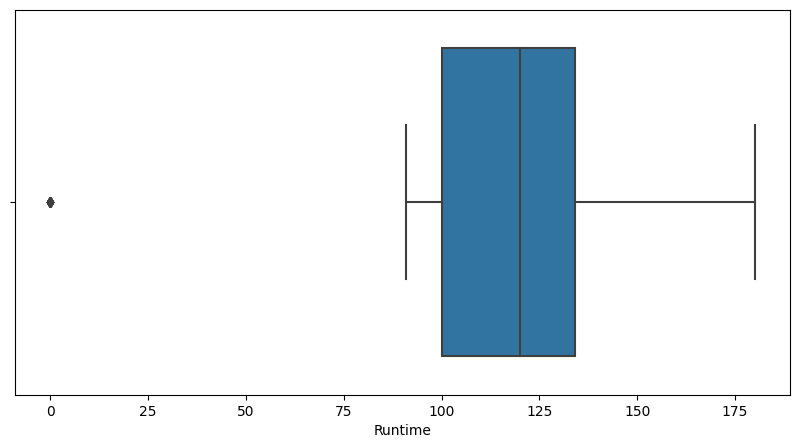

In [192]:
#check outlier 'Runtime'
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='Runtime', data=imdb_filtered)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

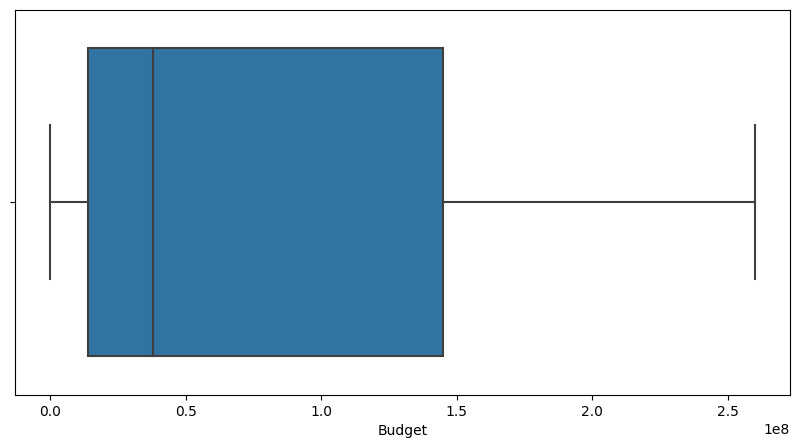

In [129]:
#check outlier 'Budget'
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='Budget', data=imdb_filtered)
plt.show

In [193]:
# join dataframe earning and imdb
earning_imdb = pd.merge(earning, imdb_filtered, on=["Movie_id"])
earning_imdb

,Movie_id,Domestic,Worldwide,Title,Rating,TotalVotes,Budget,Runtime
0,36809,56671993,1.877332e+08,12 Years a Slave (2013),8.1,496092,20000000.0,134
1,30114,18335230,6.073880e+07,127 Hours (2010),7.6,297075,18000000.0,94
2,37367,35014192,3.918778e+07,50/50 (2011),7.7,283935,8000000.0,100
3,49473,15322921,8.710045e+07,About Time (2013),7.8,225412,12000000.0,123
4,14867,6739492,1.983949e+07,Amour (2012),7.9,76121,8900000.0,127
...,...,...,...,...,...,...,...,...
112,38262,13092000,4.898204e+07,Whiplash (2014),8.5,492285,3300000.0,107
113,10023,189422889,4.712229e+08,Wreck-It Ralph (2012),7.7,295125,165000000.0,0
114,27783,233921534,7.478628e+08,X-Men: Days of Future Past (2014),8.0,560736,200000000.0,132
115,42294,146408305,3.536241e+08,X-Men: First Class (2011),7.8,556713,160000000.0,132


In [194]:
# join dataframe imdb and genre
genre_imdb = pd.merge(genre, imdb_filtered, on=["Movie_id"])
genre_imdb

,Movie_id,genre,Title,Rating,TotalVotes,Budget,Runtime
0,36809,Biography,12 Years a Slave (2013),8.1,496092,20000000.0,134
1,36809,Drama,12 Years a Slave (2013),8.1,496092,20000000.0,134
2,36809,History,12 Years a Slave (2013),8.1,496092,20000000.0,134
3,30114,Adventure,127 Hours (2010),7.6,297075,18000000.0,94
4,30114,Biography,127 Hours (2010),7.6,297075,18000000.0,94
...,...,...,...,...,...,...,...
346,42294,Adventure,X-Men: First Class (2011),7.8,556713,160000000.0,132
347,42294,Sci-Fi,X-Men: First Class (2011),7.8,556713,160000000.0,132
348,32217,Animation,Zootopia (2016),8.1,309474,150000000.0,108
349,32217,Adventure,Zootopia (2016),8.1,309474,150000000.0,108


In [156]:
 #Objective
 #1.sebutkan 3 film dengan pendapatan domestic terbesar ?
max_domestic = earning_imdb.sort_values(by=['Domestic'], ascending=False)[:3]
max_domestic

,Movie_id,Domestic,Worldwide,Title,Rating,TotalVotes,Budget,Runtime
79,38626,936662225,2.068224e+09,Star Wars: The Force Awakens (2015),8.1,676732,245000000.0,136
83,10454,623357910,1.518813e+09,The Avengers (2012),8.1,1056773,220000000.0,143
68,44253,532177324,1.056057e+09,Rogue One (2016),7.9,349210,200000000.0,133


In [157]:
 #2.sebutkan 3 film dengan pendapatan international terbesar ?
max_worldwide = earning_imdb.sort_values(by=['Worldwide'], ascending=False)[:3]
max_worldwide

,Movie_id,Domestic,Worldwide,Title,Rating,TotalVotes,Budget,Runtime
79,38626,936662225,2.068224e+09,Star Wars: The Force Awakens (2015),8.1,676732,245000000.0,136
83,10454,623357910,1.518813e+09,The Avengers (2012),8.1,1056773,220000000.0,143
13,49590,408084349,1.153304e+09,Captain America: Civil War (2016),7.9,431555,250000000.0,147


In [184]:
#3.sebutkan 3 genre terbanyak yang di film kan ?
max_genre = genre_imdb.groupby(['genre'])['Movie_id'].count().sort_values(ascending=False)[:3]
max_genre

genre
Drama        77
Adventure    43
non-genre    41
Name: Movie_id, dtype: int64

In [185]:
#4.sebutkan 3 film dengan rating tertinggi ?
max_rating = imdb_filtered.sort_values(by='Rating', ascending=False)[:3]
max_rating

,Movie_id,Title,Rating,TotalVotes,Budget,Runtime
45,46824,Inception (2010),8.8,1609713,160000000.0,148
47,46900,Interstellar (2014),8.6,1075163,165000000.0,169
112,38262,Whiplash (2014),8.5,492285,3300000.0,107


In [196]:
#5.sebutkan 3 film dengan durasi terpanjang ?
max_duration = imdb_filtered.sort_values(by='Runtime', ascending=False)[:3]
max_duration

,Movie_id,Title,Rating,TotalVotes,Budget,Runtime
105,35004,The Wolf of Wall Street (2013),8.2,881984,100000000.0,180
47,46900,Interstellar (2014),8.6,1075163,165000000.0,169
92,41835,The Hobbit: An Unexpected Journey (2012),7.9,675678,180000000.0,169


In [197]:
#6.sebutkan 3 film dengan budget termahal ?
max_budget = imdb_filtered.sort_values(by='Budget', ascending=False)[:3]
max_budget

,Movie_id,Title,Rating,TotalVotes,Budget,Runtime
81,42419,Tangled (2010),7.8,321593,260000000.0,0
13,49590,Captain America: Civil War (2016),7.9,431555,250000000.0,147
36,21411,Harry Potter and the Deathly Hallows: Part 1 (...,7.7,363226,250000000.0,146


In [203]:
#7.sebutkan 3 film dengan durasi terpendek ?
#karena kita ingin menganalisa film terpendek , value 0 kita remove
imdb_filtered.drop(imdb_filtered[imdb_filtered['Runtime'] == 0].index, inplace=True)

min_duration = imdb_filtered.sort_values(by='Runtime', ascending=True)[:3]
min_duration

<ipython-input-203-31030548e625>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_filtered.drop(imdb_filtered[imdb_filtered['Runtime'] == 0].index, inplace=True)


,Movie_id,Title,Rating,TotalVotes,Budget,Runtime
33,30401,Gravity (2013),7.8,630890,100000000.0,91
1,30114,127 Hours (2010),7.6,297075,18000000.0,94
61,29635,Moonrise Kingdom (2012),7.8,258231,16000000.0,94
